In [161]:
import ast
import networkx as nx
import importlib
import utils
import style
import graph
import copy
importlib.reload(utils)
importlib.reload(style)
importlib.reload(graph)
from utils import ast_to_networkx, node_transform
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from graph import OurGraph
import xml.dom.minidom
from IPython.display import Image


In [162]:
images_folder = 'images/'
filename_test_py = 'code_samples/test.py'


# How to load python code into ast

In [163]:

with open(filename_test_py, 'r') as file:
    code = file.read()

tree = ast.parse(code)
# astor.to_source(tree)

# Print the AST
print(ast.dump(tree))

Module(body=[FunctionDef(name='main', args=arguments(posonlyargs=[], args=[], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[FunctionDef(name='plus', args=arguments(posonlyargs=[], args=[arg(arg='a'), arg(arg='b')], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Return(value=BinOp(left=Name(id='a', ctx=Load()), op=Add(), right=Name(id='b', ctx=Load())))], decorator_list=[]), Assign(targets=[Tuple(elts=[Name(id='x', ctx=Store()), Name(id='y', ctx=Store())], ctx=Store())], value=Tuple(elts=[Constant(value=1), Constant(value=2)], ctx=Load())), Assign(targets=[Name(id='res', ctx=Store())], value=Call(func=Name(id='plus', ctx=Load()), args=[Name(id='x', ctx=Load()), Name(id='y', ctx=Load())], keywords=[])), Return(value=Name(id='res', ctx=Load()))], decorator_list=[])], type_ignores=[])


visualizing AST using `networkx` library 

/var/folders/gl/5pxh7s9n19vfr9kxhf29vxyc0000gq/T/ipykernel_1248/2246657862.py:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


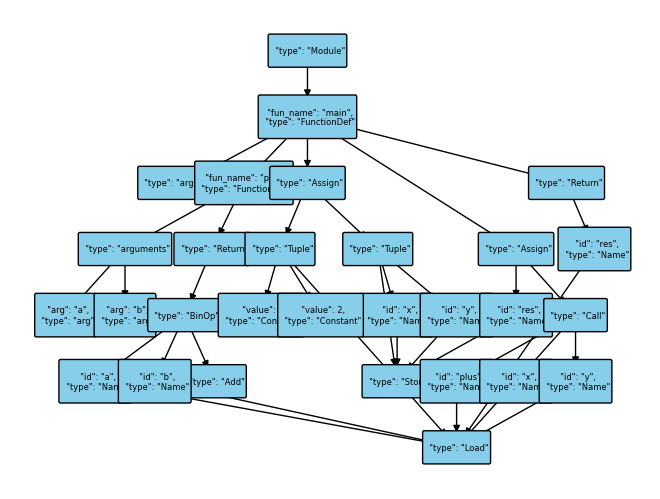

In [164]:
def visualize_ast(filename):
    with open(filename, 'r') as file:
        code = file.read()

    tree = ast.parse(code)
    G = ast_to_networkx(tree)

    node_labels = ({node: node_transform(G, node) for node in G.nodes()})
    pos = graphviz_layout(G, prog="dot")
    pos = {k: (x, 10*y) for k, (x, y) in pos.items()}
    node_size = [(len(node_transform(G, n))+20)*6 for n in G.nodes()]
    nx.draw(G, pos=pos, with_labels=True, node_size=node_size, labels=node_labels, node_shape="s", arrows = True, node_color="none", bbox=dict(facecolor="skyblue", edgecolor='black', boxstyle='round,pad=0.2'), font_size=6)

    plt.show()
G = ast_to_networkx(tree)
visualize_ast(filename_test_py)

# Better visualization for AST

images/temp2.drawio -> images/temp2.png


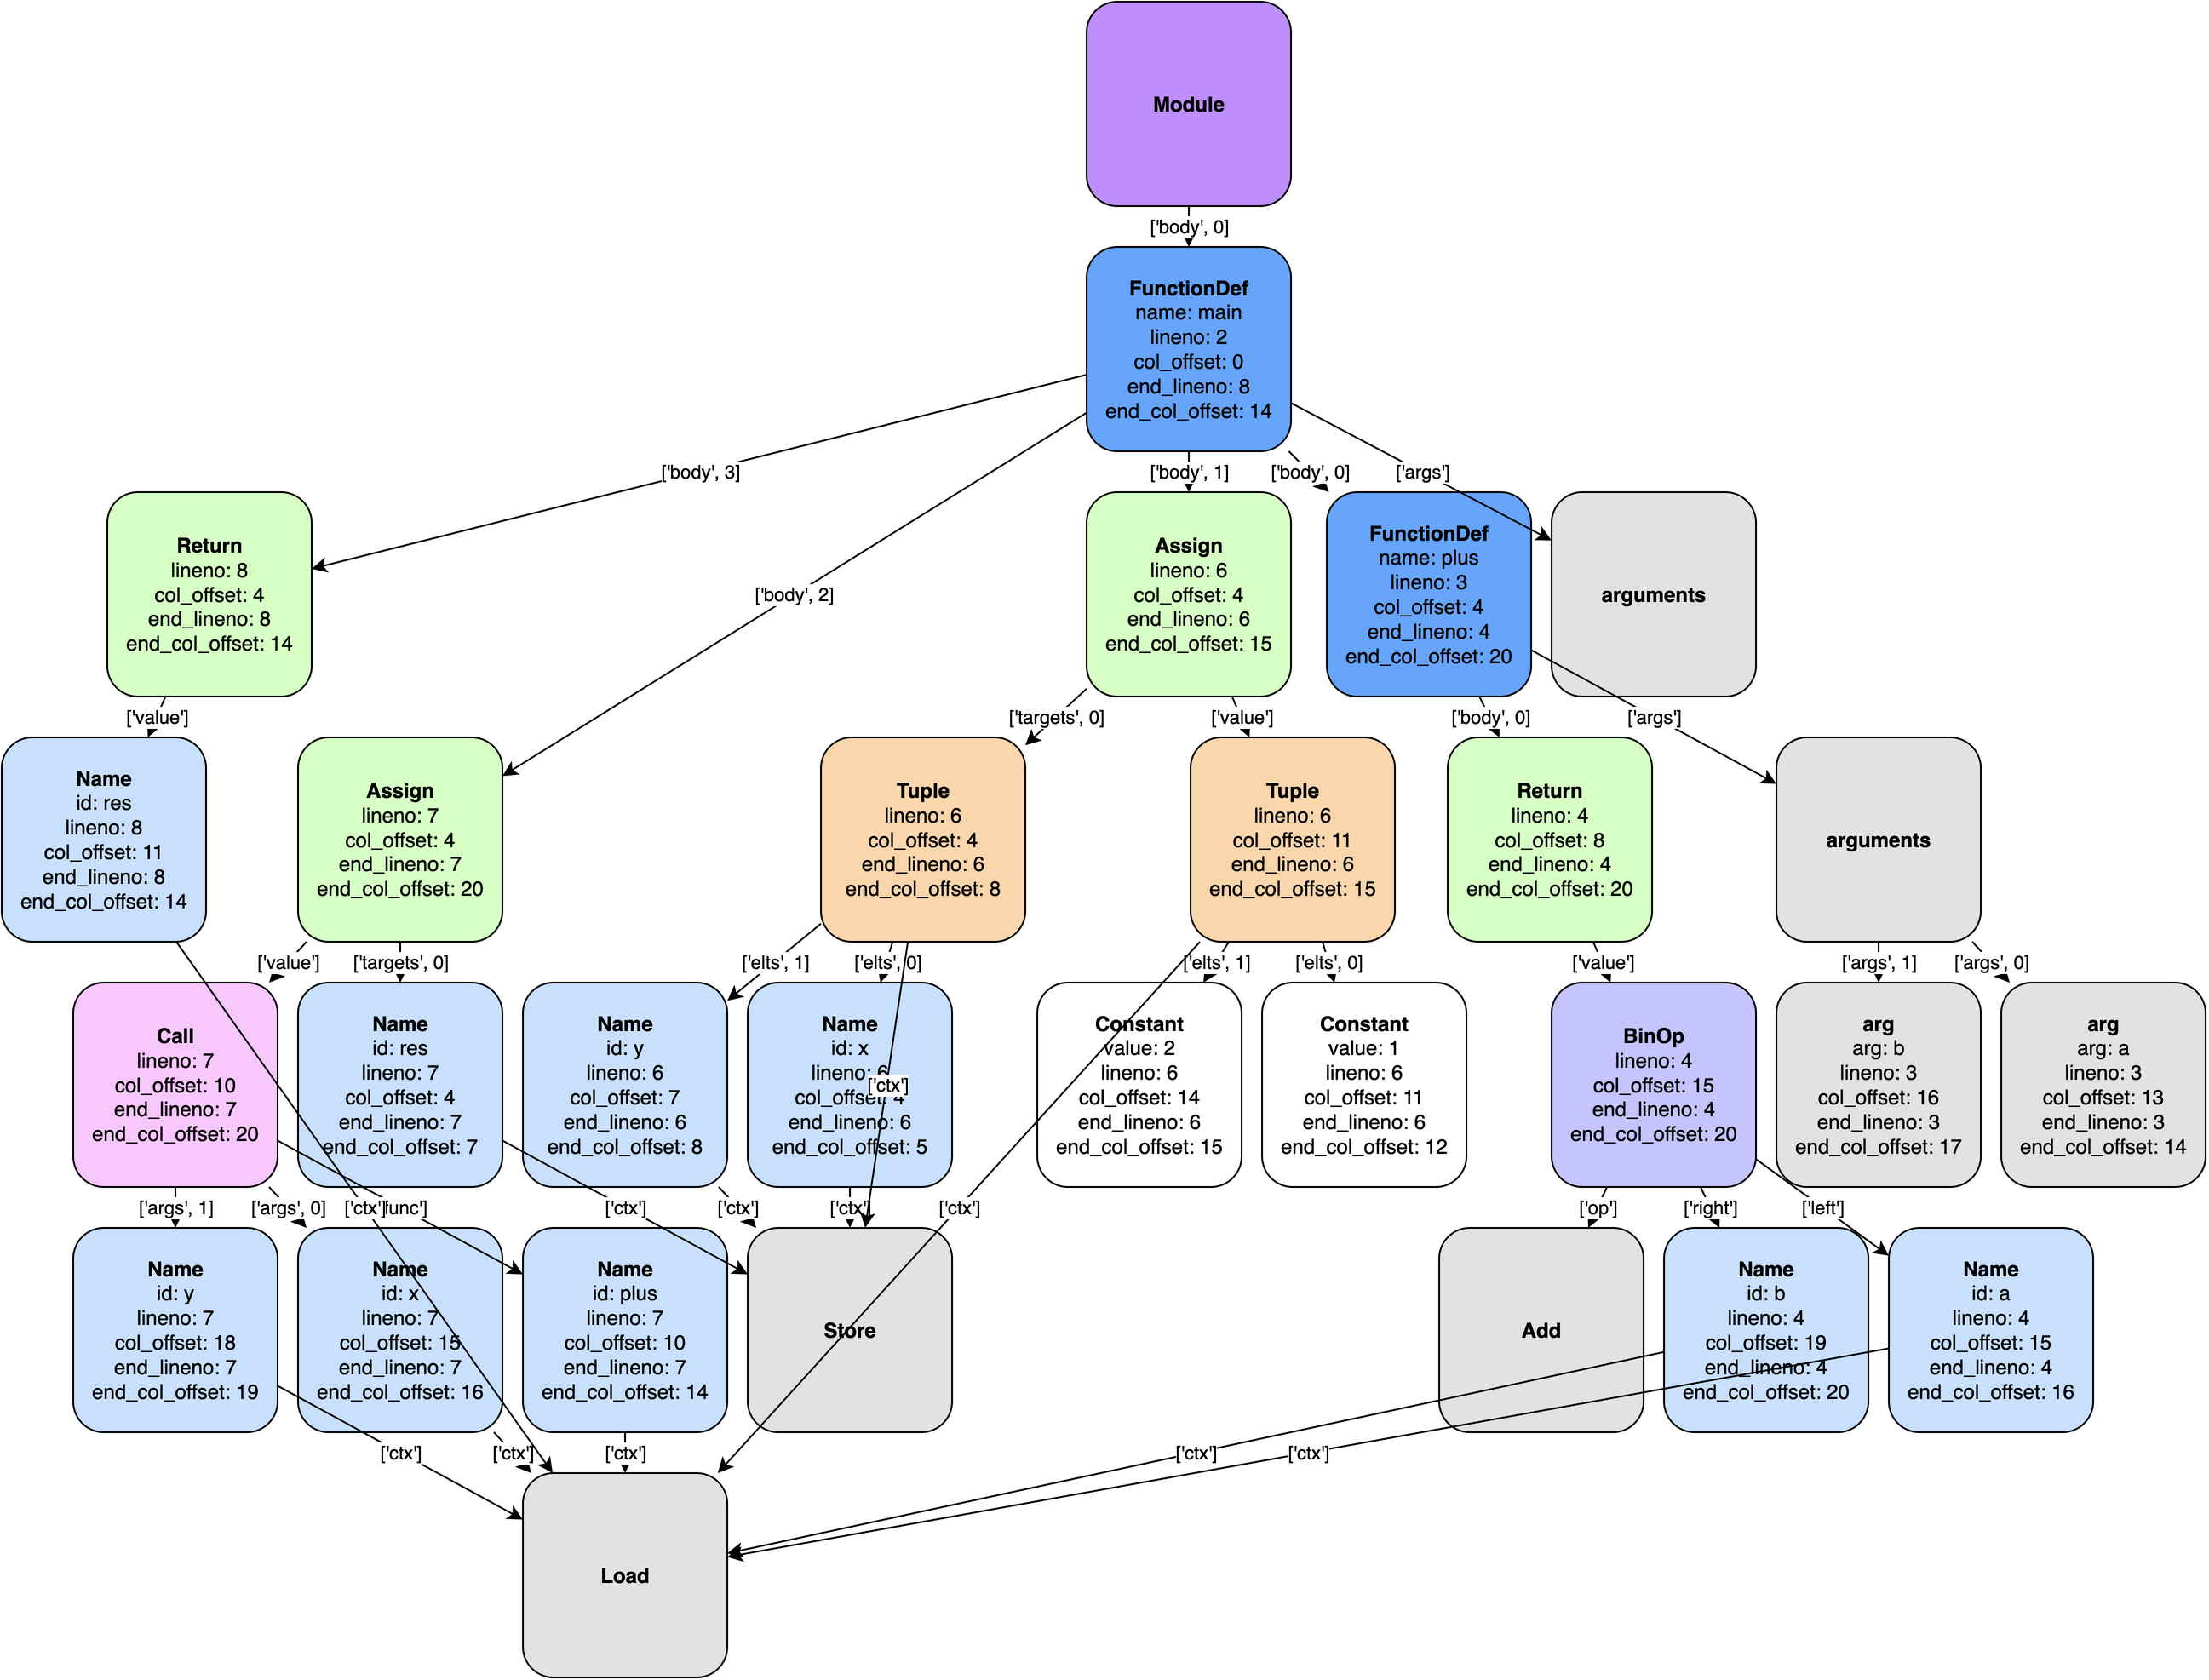

In [165]:
# import graph as g
importlib.reload(style)
importlib.reload(graph)
from graph import OurGraph

from style import OurGraphToXML
import os 
# import copy
import ast

def vis_drawio(g: OurGraph, output_file_name: str = 'images/temp2'):
    """
    to use this function you need to install drawio and cleate an alias for its command line interface.
    for mac:
        drawio="/Applications/draw.io.app/Contents/MacOS/draw.io"
    """
    mxfile = OurGraphToXML(y_scaling=2, x_scaling=1).graph_to_xml(g)
    xml_str = xml.dom.minidom.parseString(ET.tostring(mxfile)).toprettyxml()
    
    output_file = f'{output_file_name}.png'
    filename    = f'{output_file_name}.drawio'

    with open(filename, 'w') as file:
        file.write(xml_str) 

    bashCommand = f"/Applications/draw.io.app/Contents/MacOS/draw.io -x -f png --scale 2   -o {output_file} {filename}"
    os.system(bashCommand) 

    return Image(output_file)     


G = OurGraph.from_file(filename_test_py)
vis_drawio(G)

# Expanding a function call

def main():

    def plus(a, b):
        return a + b
    x, y = 1, 2
    a_new, b_new = x, y
    res = a_new + b_new
    return res

images/temp2.drawio -> images/temp2.png


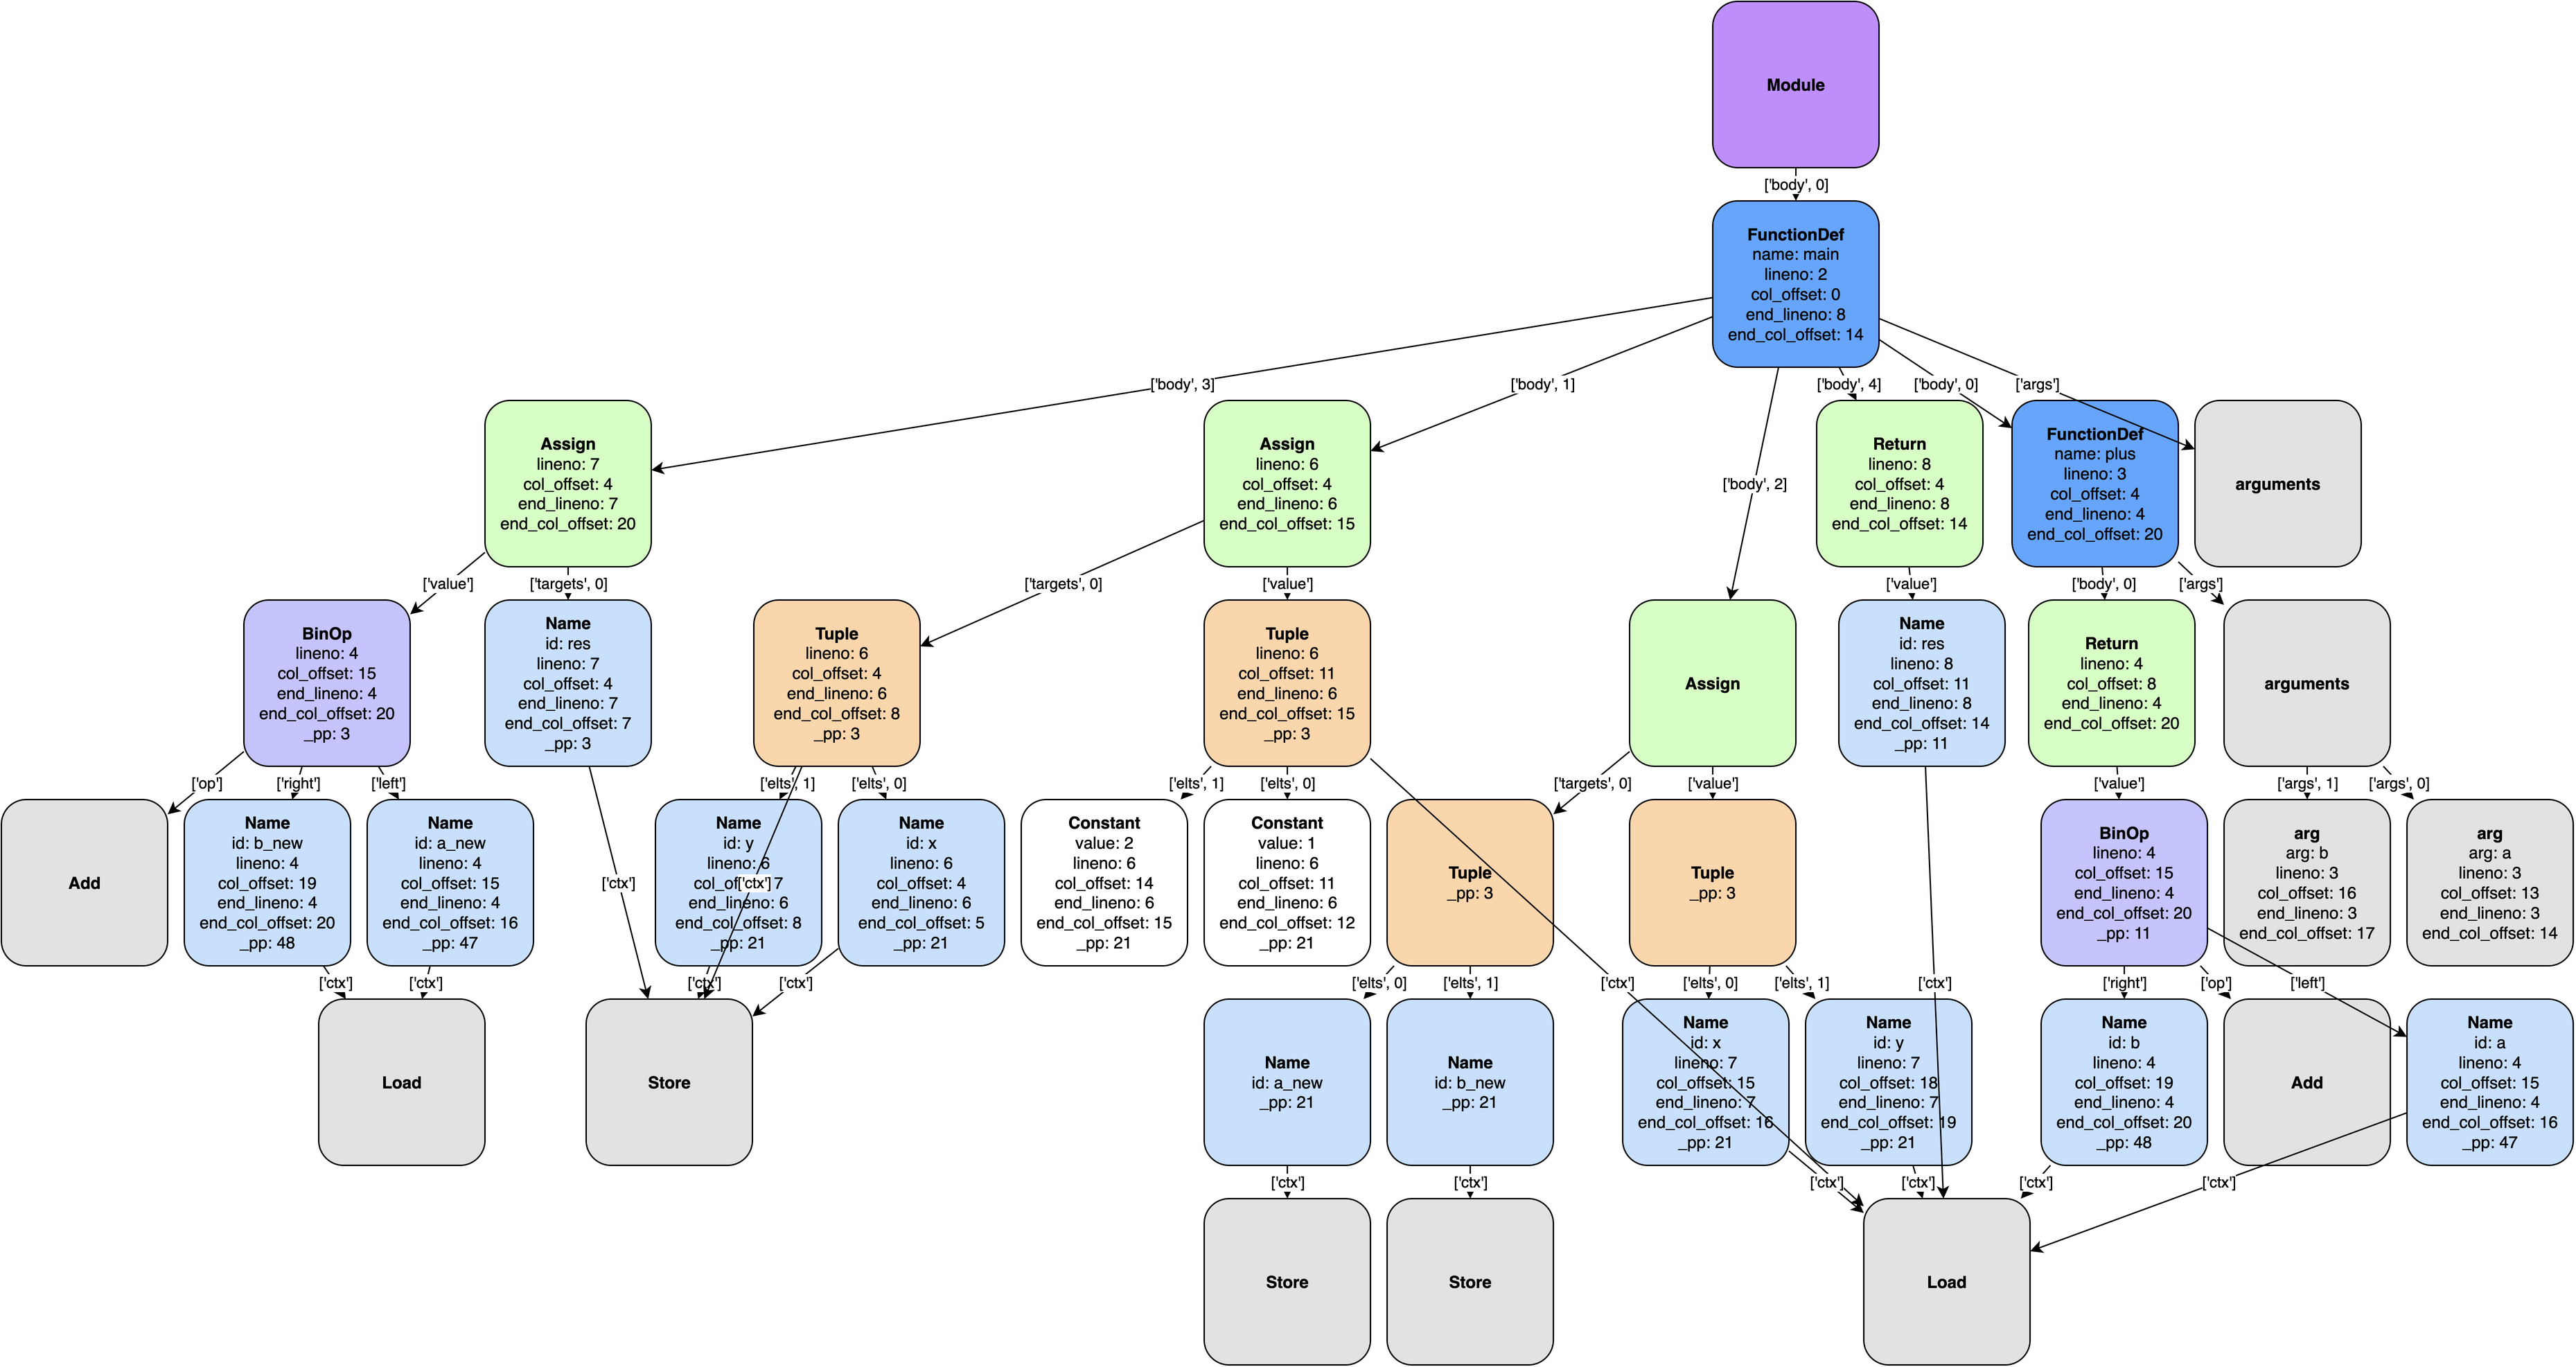

In [166]:
import transforms
importlib.reload(transforms)
from transforms import expand_function

G_new = copy.deepcopy(G)
G_new.refresh()
for node_id, node in G_new.ast_nodes.items():
    if isinstance(node, ast.Call):
        break

expanded = expand_function(G_new, node_id)
print(expanded.to_source())
vis_drawio(expanded)


In [159]:
expanded

# Extracting a function

images/temp2.drawio -> images/temp2.png


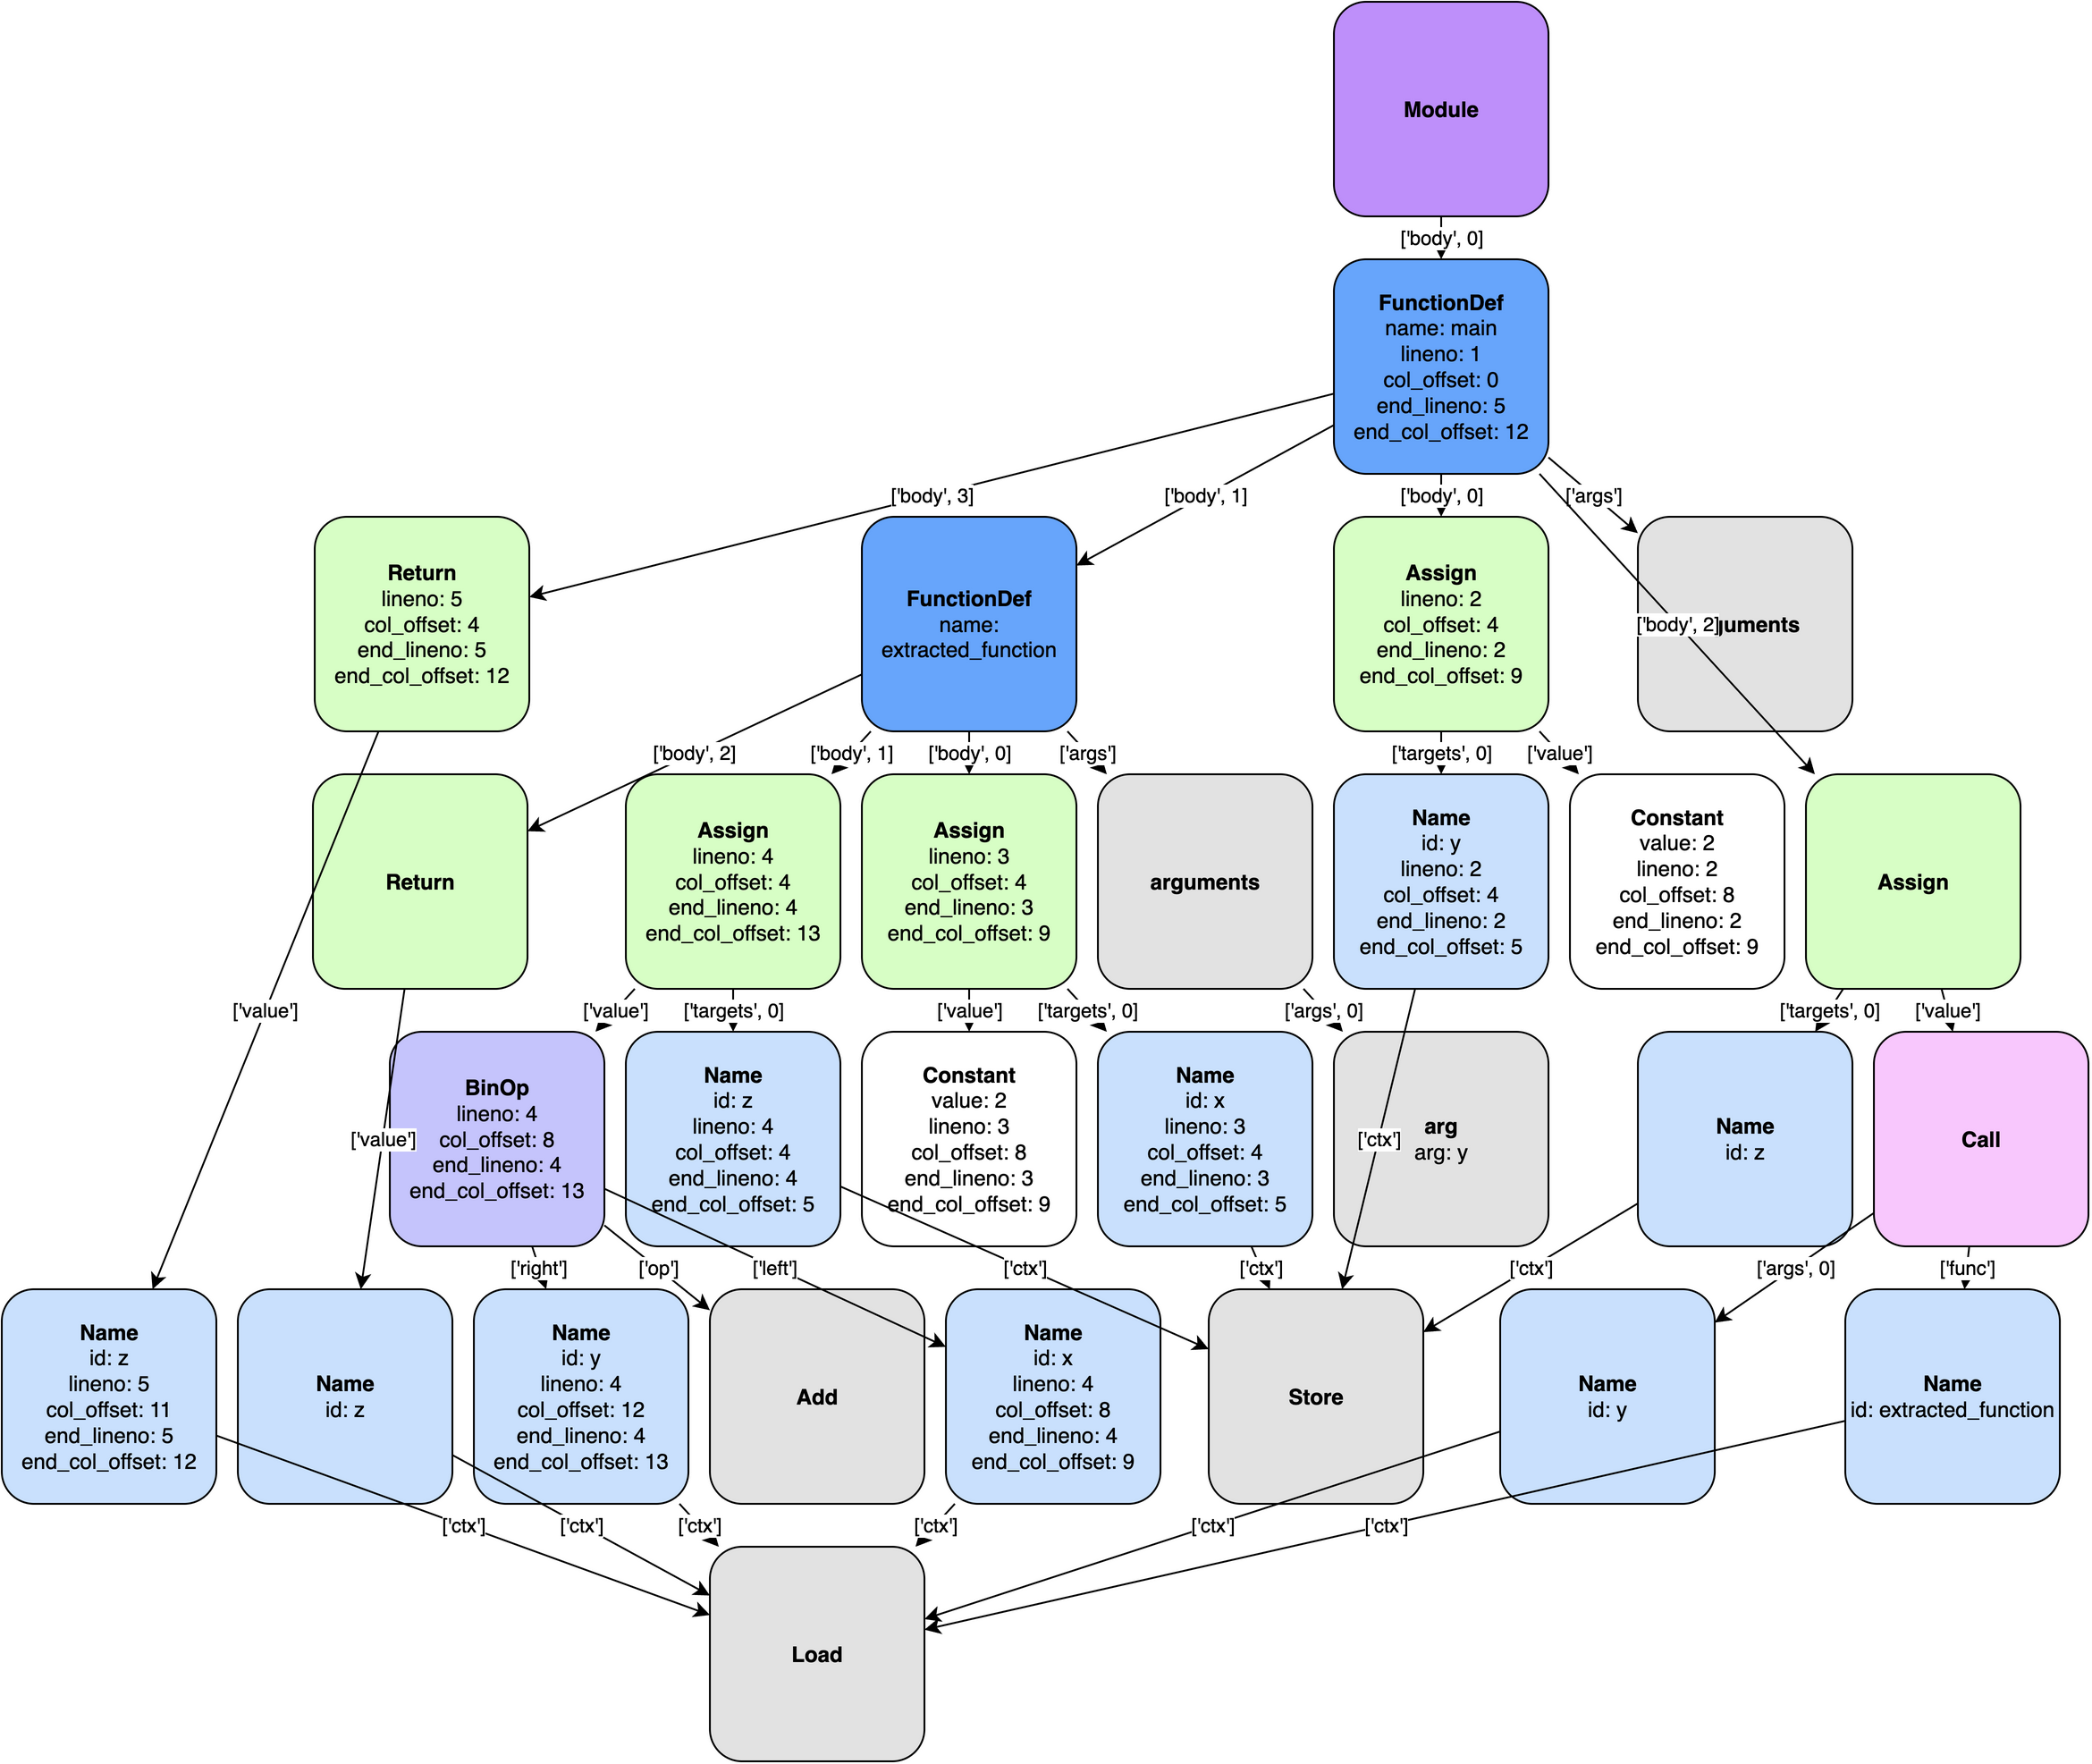

In [174]:
import transforms
importlib.reload(transforms)
from transforms import extract_function


filename_test_py = 'code_samples/test2.py'
G = OurGraph.from_file(filename_test_py)
G2 = copy.deepcopy(G)
G2.refresh()
node_id = id(G2.ast_tree.body[0])
G2.ast_nodes[node_id]
G2 = extract_function(G2, node_id, 1, 2)
vis_drawio(G2)

images/temp2.drawio -> images/temp2.png


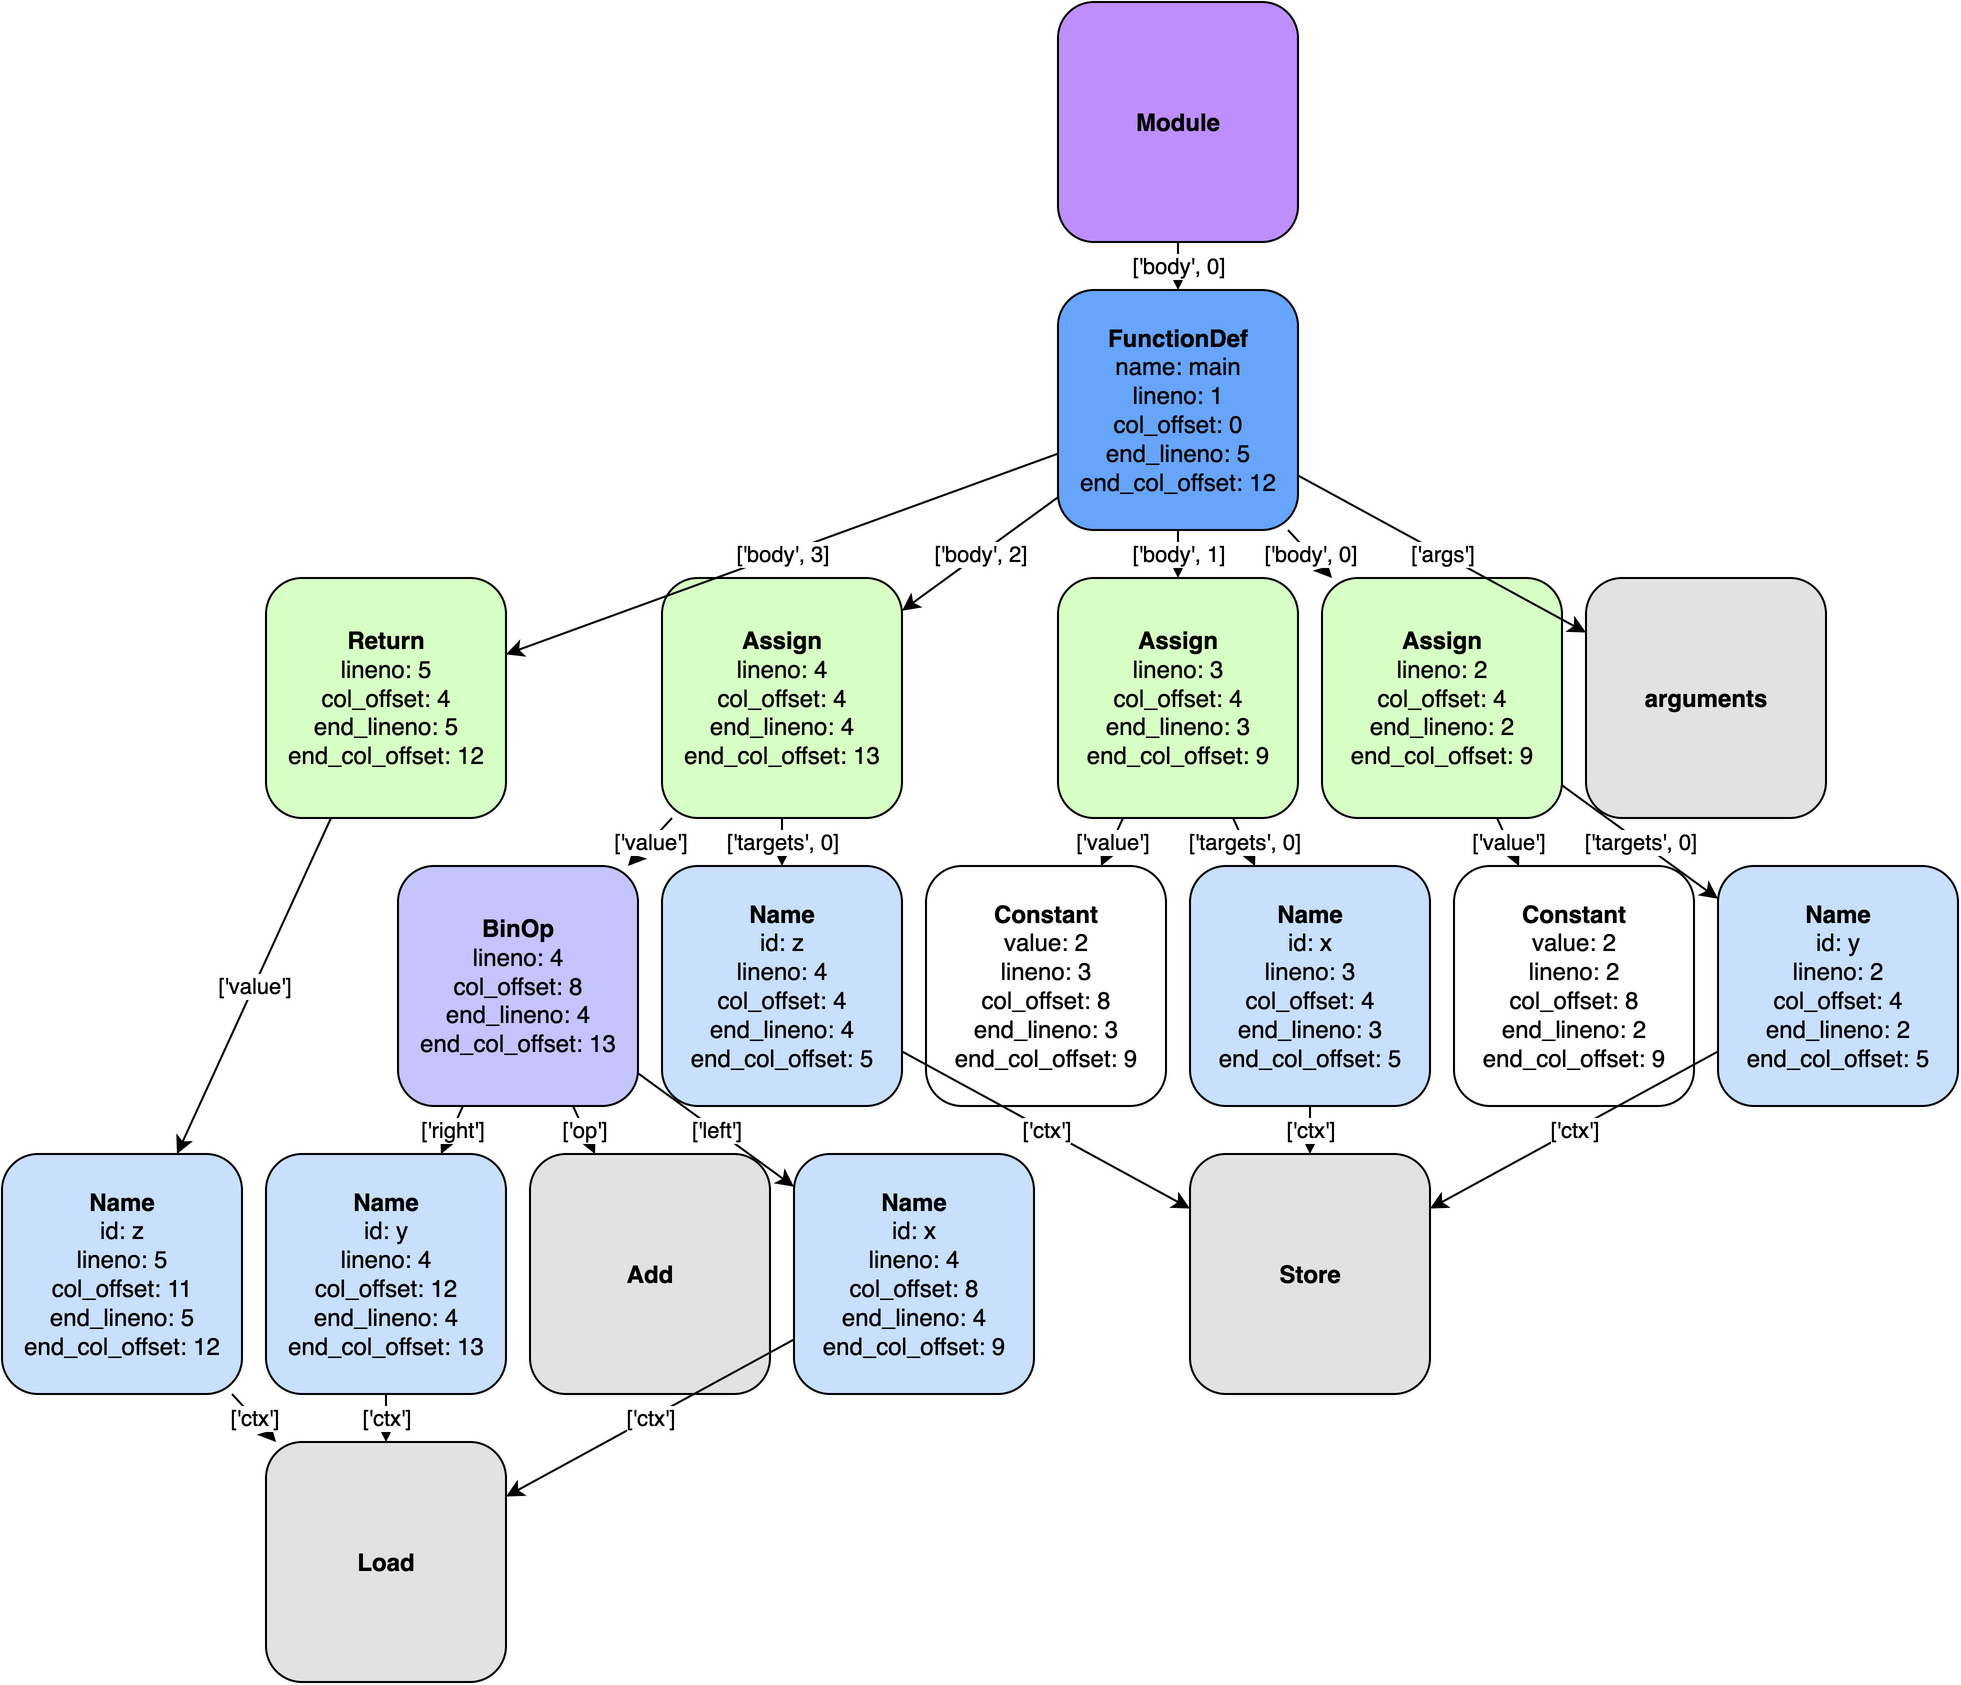

In [169]:
vis_drawio(G)

In [175]:
print(G.to_source())
print('_____________')
print(G2.to_source())

def main():
    y = 2
    x = 2
    z = x + y
    return z

_____________
def main():
    y = 2

    def extracted_function(y):
        x = 2
        z = x + y
        return z
    z = extracted_function(y)
    return z



In [1]:
def some_function(l: list, x: int):
    l.append(x)

In [2]:
l = [1, 2, 3]
some_function(l, 4)
l

[1, 2, 3, 4]